<a href="https://colab.research.google.com/github/Sparrow0hawk/crime_sim_toolkit/blob/develop-mv-datetime/examples/benchmarking/Benchmarking_poiss_methods_agg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for benchmarking SimplePoisson methods

Benchmarking the different simplePoisson methods when data is aggregated to force area.




In [1]:
%cd ~/

! git clone --single-branch --branch develop-datetime-mw  https://github.com/Sparrow0hawk/crime_sim_toolkit.git

/root
Cloning into 'crime_sim_toolkit'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (313/313), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 980 (delta 222), reused 254 (delta 174), pack-reused 667
Receiving objects: 100% (980/980), 49.12 MiB | 32.41 MiB/s, done.
Resolving deltas: 100% (626/626), done.


In [2]:
%cd ~/crime_sim_toolkit

!pip install -q -r requirements.txt

/root/crime_sim_toolkit
     |████████████████████████████████| 215kB 4.0MB/s 
     |████████████████████████████████| 92kB 28.5MB/s 
     |████████████████████████████████| 13.1MB 49.7MB/s 
     |████████████████████████████████| 20.4MB 43.2MB/s 
     |████████████████████████████████| 10.5MB 28.0MB/s 
     |████████████████████████████████| 235kB 57.6MB/s 
     |████████████████████████████████| 512kB 56.5MB/s 
     |████████████████████████████████| 61kB 25.0MB/s 
     |████████████████████████████████| 25.2MB 1.2MB/s 
     |████████████████████████████████| 153kB 38.2MB/s 
ERROR: kaggle 1.5.5 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have co

# RESTART RUNTIME

In [2]:
%cd ~/crime_sim_toolkit

!python setup.py -q install

/root/crime_sim_toolkit
/usr/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'lisence'
  warnings.warn(msg)


## Loading data

Using data from a [custom dowload](https://data.police.uk/data/) from Police Data UK we can load that data, covert it to counts by crime_type by LSOA by psuedo Week/Day by passing the directory to the Poisson_sim function.

Sample data used here is included within the [github repository](https://github.com/Sparrow0hawk/crime_sim_toolkit/tree/master/sample_data) and covers January-June from 2017-2019.

In [3]:
import crime_sim_toolkit.poisson_sim as Poisson_sim


sim_week = Poisson_sim.Poisson_sim(
                               # because of the data passed these are the LA we want
                               LA_names=['Kirklees','Calderdale','Leeds','Bradford','Wakefield'], 
                               directory='/root/crime_sim_toolkit/sample_data',
                               # this can either be Day or Week
                               timeframe='Day',
                               aggregate=True)

 
Fetching count data from police reports.
Sit back and have a brew, this may take sometime.
 
Number of data files found:  18
Psuedo days allocated to all reports.
Datetime column configured.


In [4]:
sim_week.data.head()

,datetime,Crime_type,LSOA_code,Counts
0,2017-01-01,Anti-social behaviour,West Yorkshire,153
1,2017-01-01,Bicycle theft,West Yorkshire,4
2,2017-01-01,Burglary,West Yorkshire,86
3,2017-01-01,Criminal damage and arson,West Yorkshire,71
4,2017-01-01,Drugs,West Yorkshire,11


## Sampling new data

Based on the loaded data we can now create an out of bag sample and use the poisson sampler to generate crime reports based on historic reports to be compared to the out of bag sample.

In [5]:
test_data = sim_week.out_of_bag_prep(sim_week.data)

train_data = sim_week.oob_train_split(sim_week.data, test_data)


Datetime column configured.
Datetime column configured.
Datetime column configured.


## Benchmarking for simple method

In [6]:
%%time

# can use alternate methods for simulator 
# method dict for sampling approaches
        # simple : fits a poisson based on all data passed
        # mixed : fits a poisson and linear model and calulates mean counts from both models
        # zero : drops zeroes before fitting poisson unless all zero
      
datat = sim_week.SimplePoission(train_data, test_data, method='simple', mv_window=0)

Datetime column configured.
Datetime column configured.
Time resolution set to:  datetime
Beginning sampling.
Simulating datetime: 2019-01-01 00:00:00
Simulating datetime: 2019-01-02 00:00:00
Simulating datetime: 2019-01-03 00:00:00
Simulating datetime: 2019-01-04 00:00:00
Simulating datetime: 2019-01-05 00:00:00
Simulating datetime: 2019-01-06 00:00:00
Simulating datetime: 2019-01-07 00:00:00
Simulating datetime: 2019-01-08 00:00:00
Simulating datetime: 2019-01-09 00:00:00
Simulating datetime: 2019-01-10 00:00:00
Simulating datetime: 2019-01-11 00:00:00
Simulating datetime: 2019-01-12 00:00:00
Simulating datetime: 2019-01-13 00:00:00
Simulating datetime: 2019-01-14 00:00:00
Simulating datetime: 2019-01-15 00:00:00
Simulating datetime: 2019-01-16 00:00:00
Simulating datetime: 2019-01-17 00:00:00
Simulating datetime: 2019-01-18 00:00:00
Simulating datetime: 2019-01-19 00:00:00
Simulating datetime: 2019-01-20 00:00:00
Simulating datetime: 2019-01-21 00:00:00
Simulating datetime: 2019-01-

Datetime column configured.
Datetime column configured.
Root mean squared error of poisson sampler:  70.0
Mean absolute error:  57.6
Median absolute error:  49.0
-----------
Total simulated crime events:  154409
Total crime events in holdout data:  161391
Undersampling by:  -4.300000000000004 %
-------


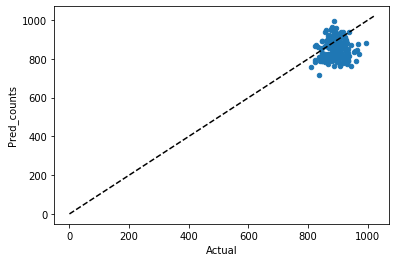

In [7]:
diff_table = sim_week.error_Reporting(test_data=test_data, simulated_data=datat)

## Benchmarking for zero method

In [8]:
%%time

# can use alternate methods for simulator 
# method dict for sampling approaches
        # simple : fits a poisson based on all data passed
        # mixed : fits a poisson and linear model and calulates mean counts from both models
        # zero : drops zeroes before fitting poisson unless all zero
      
datat = sim_week.SimplePoission(train_data, test_data, method='zero', mv_window=0)

Datetime column configured.
Datetime column configured.
Time resolution set to:  datetime
Beginning sampling.
Simulating datetime: 2019-01-01 00:00:00
Simulating datetime: 2019-01-02 00:00:00
Simulating datetime: 2019-01-03 00:00:00
Simulating datetime: 2019-01-04 00:00:00
Simulating datetime: 2019-01-05 00:00:00
Simulating datetime: 2019-01-06 00:00:00
Simulating datetime: 2019-01-07 00:00:00
Simulating datetime: 2019-01-08 00:00:00
Simulating datetime: 2019-01-09 00:00:00
Simulating datetime: 2019-01-10 00:00:00
Simulating datetime: 2019-01-11 00:00:00
Simulating datetime: 2019-01-12 00:00:00
Simulating datetime: 2019-01-13 00:00:00
Simulating datetime: 2019-01-14 00:00:00
Simulating datetime: 2019-01-15 00:00:00
Simulating datetime: 2019-01-16 00:00:00
Simulating datetime: 2019-01-17 00:00:00
Simulating datetime: 2019-01-18 00:00:00
Simulating datetime: 2019-01-19 00:00:00
Simulating datetime: 2019-01-20 00:00:00
Simulating datetime: 2019-01-21 00:00:00
Simulating datetime: 2019-01-

Datetime column configured.
Datetime column configured.
Root mean squared error of poisson sampler:  71.7
Mean absolute error:  58.6
Median absolute error:  48.0
-----------
Total simulated crime events:  153484
Total crime events in holdout data:  161391
Undersampling by:  -4.900000000000004 %
-------


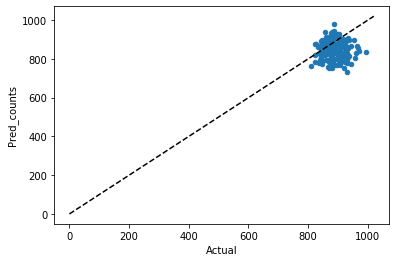

In [9]:
diff_table = sim_week.error_Reporting(test_data=test_data, simulated_data=datat)

## Benchmarking for mixed method

In [10]:
%%time

# can use alternate methods for simulator 
# method dict for sampling approaches
        # simple : fits a poisson based on all data passed
        # mixed : fits a poisson and linear model and calulates mean counts from both models
        # zero : drops zeroes before fitting poisson unless all zero
      
datat = sim_week.SimplePoission(train_data, test_data, method='mixed', mv_window=0)

Datetime column configured.
Datetime column configured.
Time resolution set to:  datetime
Beginning sampling.
Simulating datetime: 2019-01-01 00:00:00
Simulating datetime: 2019-01-02 00:00:00
Simulating datetime: 2019-01-03 00:00:00
Simulating datetime: 2019-01-04 00:00:00
Simulating datetime: 2019-01-05 00:00:00
Simulating datetime: 2019-01-06 00:00:00
Simulating datetime: 2019-01-07 00:00:00
Simulating datetime: 2019-01-08 00:00:00
Simulating datetime: 2019-01-09 00:00:00
Simulating datetime: 2019-01-10 00:00:00
Simulating datetime: 2019-01-11 00:00:00
Simulating datetime: 2019-01-12 00:00:00
Simulating datetime: 2019-01-13 00:00:00
Simulating datetime: 2019-01-14 00:00:00
Simulating datetime: 2019-01-15 00:00:00
Simulating datetime: 2019-01-16 00:00:00
Simulating datetime: 2019-01-17 00:00:00
Simulating datetime: 2019-01-18 00:00:00
Simulating datetime: 2019-01-19 00:00:00
Simulating datetime: 2019-01-20 00:00:00
Simulating datetime: 2019-01-21 00:00:00
Simulating datetime: 2019-01-

Datetime column configured.
Datetime column configured.
Root mean squared error of poisson sampler:  78.2
Mean absolute error:  64.3
Median absolute error:  60.0
-----------
Total simulated crime events:  165101.0
Total crime events in holdout data:  161391
Oversampling by:  2.299999999999991 %
-------


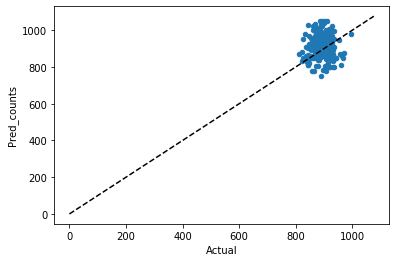

In [11]:
diff_table = sim_week.error_Reporting(test_data=test_data, simulated_data=datat)

## Benchmarking for simple method with moving_window of 1 day

In [12]:
%%time

# can use alternate methods for simulator 
# method dict for sampling approaches
        # simple : fits a poisson based on all data passed
        # mixed : fits a poisson and linear model and calulates mean counts from both models
        # zero : drops zeroes before fitting poisson unless all zero
      
datat = sim_week.SimplePoission(train_data, test_data, method='simple', mv_window=1)

Datetime column configured.
Datetime column configured.
Time resolution set to:  datetime
Beginning sampling.
Simulating datetime: 2019-01-01 00:00:00
Simulating datetime: 2019-01-02 00:00:00
Simulating datetime: 2019-01-03 00:00:00
Simulating datetime: 2019-01-04 00:00:00
Simulating datetime: 2019-01-05 00:00:00
Simulating datetime: 2019-01-06 00:00:00
Simulating datetime: 2019-01-07 00:00:00
Simulating datetime: 2019-01-08 00:00:00
Simulating datetime: 2019-01-09 00:00:00
Simulating datetime: 2019-01-10 00:00:00
Simulating datetime: 2019-01-11 00:00:00
Simulating datetime: 2019-01-12 00:00:00
Simulating datetime: 2019-01-13 00:00:00
Simulating datetime: 2019-01-14 00:00:00
Simulating datetime: 2019-01-15 00:00:00
Simulating datetime: 2019-01-16 00:00:00
Simulating datetime: 2019-01-17 00:00:00
Simulating datetime: 2019-01-18 00:00:00
Simulating datetime: 2019-01-19 00:00:00
Simulating datetime: 2019-01-20 00:00:00
Simulating datetime: 2019-01-21 00:00:00
Simulating datetime: 2019-01-

Datetime column configured.
Datetime column configured.
Root mean squared error of poisson sampler:  69.4
Mean absolute error:  56.4
Median absolute error:  47.0
-----------
Total simulated crime events:  153526
Total crime events in holdout data:  161391
Undersampling by:  -4.900000000000004 %
-------


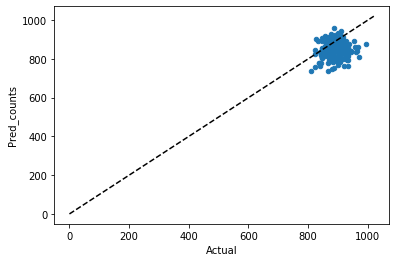

In [13]:
diff_table = sim_week.error_Reporting(test_data=test_data, simulated_data=datat)